In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Library Imports
# ---------------------------------------------
# pandas: for data loading, cleaning, and manipulation
# numpy: for numerical operations and array handling
# matplotlib: for creating plots and visualizations
# seaborn: for statistical styling and improved plot aesthetics
# ---------------------------------------------

# ---------------------------------------------
# Global Settings
# ---------------------------------------------

# Display full content of columns (useful when working with text-heavy datasets)
pd.set_option('display.max_colwidth', 200)

# Apply a clean and modern seaborn theme to all plots
sns.set(style='whitegrid')


In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')  # load the csv file to the data stream
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/46-stocks-moving-in-fridays-mid-day-session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",https://www.benzinga.com/news/20/05/16095304/b-of-a-securities-maintains-neutral-on-agilent-technologies-raises-price-target-to-88,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [ ]:
# ---------------------------------------------
# Feature Engineering: Headline Length
# ---------------------------------------------

# Convert the 'headline' column to string type (in case there are non-string values)
# Then calculate the length of each headline and store it in a new column 'headline_length'
df['headline_length'] = df['headline'].astype(str).apply(len)

# Generate descriptive statistics for the 'headline_length' column
# This includes count, mean, standard deviation, min, max, and quartiles
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

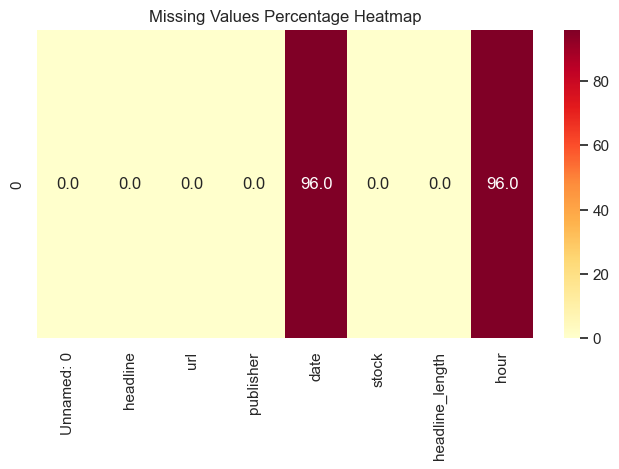

In [25]:
# ---------------------------------------------
# Heatmap of Missing Values (Percentage per Column)
# ---------------------------------------------

# Calculate percentage of missing values per column
missing_percent = df.isnull().mean().to_frame() * 100  # Convert to DataFrame for heatmap

# Set figure size
plt.figure(figsize=(8, 4))

# Create a heatmap showing % of missing values
sns.heatmap(missing_percent.T, annot=True, fmt=".1f", cmap="YlOrRd", cbar=True)

# Add title
plt.title("Missing Values Percentage Heatmap")

# Display the plot
plt.show()


In [ ]:
# ---------------------------------------------
# Analyzing Publisher Distribution
# ---------------------------------------------

# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top 20 publishers by article count
publisher_counts.head(20)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

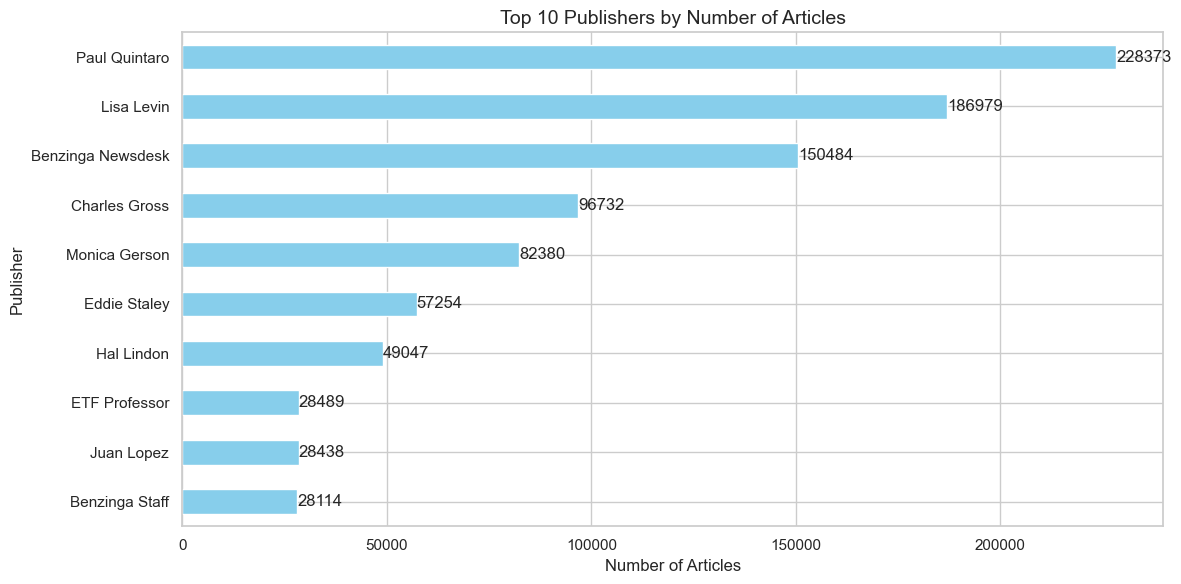

In [27]:
# ---------------------------------------------
# Visualizing Top Publishers (Updated)
# ---------------------------------------------

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Bar chart of top 10 publishers by article count
publisher_counts.head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Add title and labels
plt.title("Top 10 Publishers by Number of Articles", fontsize=14)
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")

# Optional: Add value labels on bars
for index, value in enumerate(publisher_counts.head(10).sort_values(ascending=True)):
    plt.text(value + 0.5, index, str(value), va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------------------------
# Convert 'date' Column to Datetime
# ---------------------------------------------

# Convert the 'date' column to pandas datetime objects
# - Invalid parsing will be set as NaT (errors='coerce')
# - UTC timezone is applied
# - cache=False disables caching for large datasets
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True, cache=False)


In [ ]:
# ---------------------------------------------
# Check the Conversion
# ---------------------------------------------

# Verify the data type of the 'date' column
df['date'].dtype

# Display the first few rows to confirm the conversion worked correctly
df['date'].head()  # checked if the dates were successfully converted to datetime


0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]

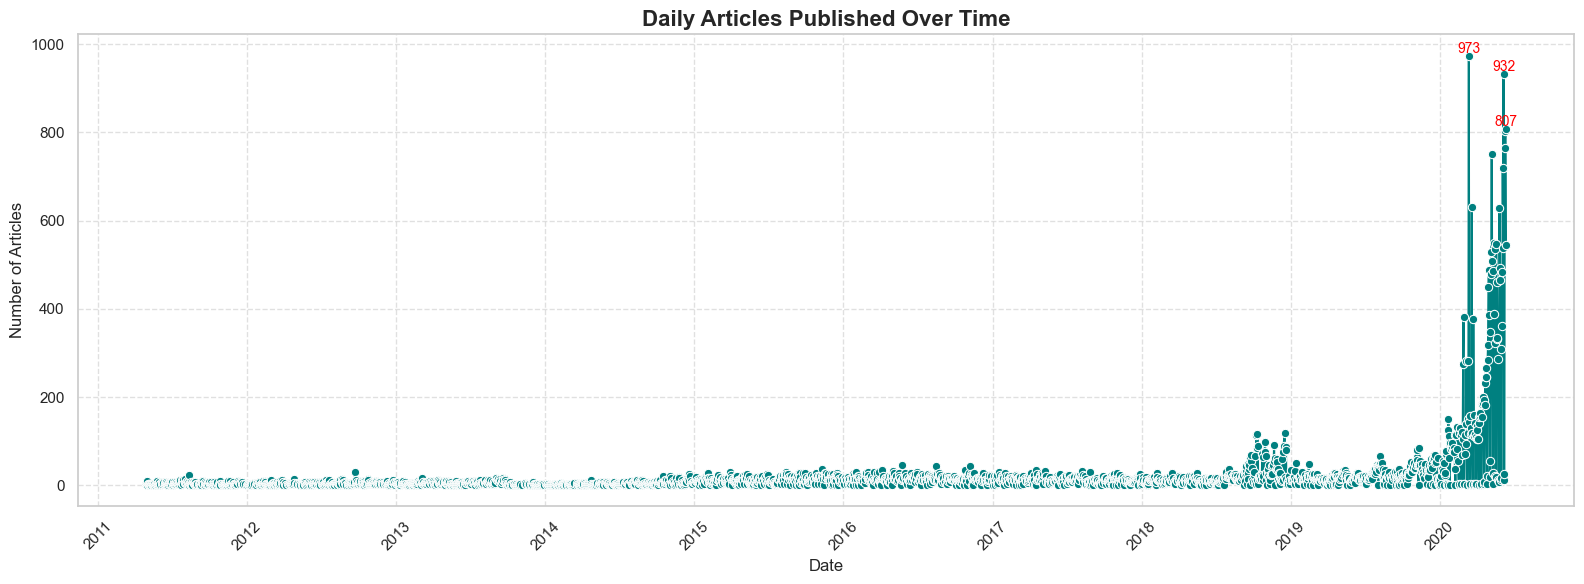

In [28]:
# ---------------------------------------------
# Articles Published Per Day (Enhanced)
# ---------------------------------------------

# Group the data by date and count the number of articles for each day
articles_per_day = df.groupby(df['date'].dt.date).size()

# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot the time series with style enhancements
sns.lineplot(x=articles_per_day.index, y=articles_per_day.values, marker='o', color='teal')

# Add title, axis labels, and grid
plt.title("Daily Articles Published Over Time", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: annotate peaks (days with highest article counts)
top_days = articles_per_day.sort_values(ascending=False).head(3)
for date, count in top_days.items():
    plt.text(date, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, color='red')

# Display the plot
plt.tight_layout()
plt.show()


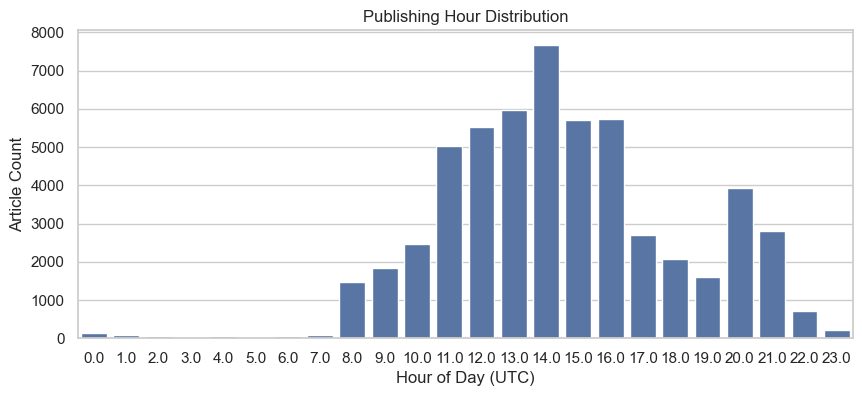

In [ ]:
# ---------------------------------------------
# Analyze Publishing Hour Distribution
# ---------------------------------------------

# Extract the hour from the 'date' column and create a new column 'hour'
df['hour'] = df['date'].dt.hour

# Set figure size for clarity
plt.figure(figsize=(10, 4))

# Plot the distribution of articles by hour of the day
sns.countplot(x=df['hour'])

# Add title and axis labels
plt.title("Publishing Hour Distribution")
plt.ylabel("Article Count")
plt.xlabel("Hour of Day (UTC)")

# Display the plot
plt.show()


In [ ]:
# ---------------------------------------------
# Extract Top Keywords from Headlines
# ---------------------------------------------

# Import CountVectorizer for converting text into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# - Remove English stop words
# - Limit to top 30 most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=30)

# Fit the vectorizer to the headlines and transform them into a document-term matrix
X = vectorizer.fit_transform(df['headline'].astype(str))

# Retrieve the feature names (top keywords)
keywords = vectorizer.get_feature_names_out()

# Display the top keywords
keywords


array(['00', '52', 'announces', 'benzinga', 'buy', 'day', 'downgrades',
       'earnings', 'eps', 'est', 'higher', 'maintains', 'market', 'mid',
       'new', 'price', 'pt', 'raises', 'reports', 'sales', 'says',
       'session', 'shares', 'stocks', 'target', 'trading', 'update',
       'upgrades', 'vs', 'week'], dtype=object)

C:\Users\mikiyas\AppData\Local\Temp\ipykernel_12128\119235543.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='keyword', y='count', palette="viridis")


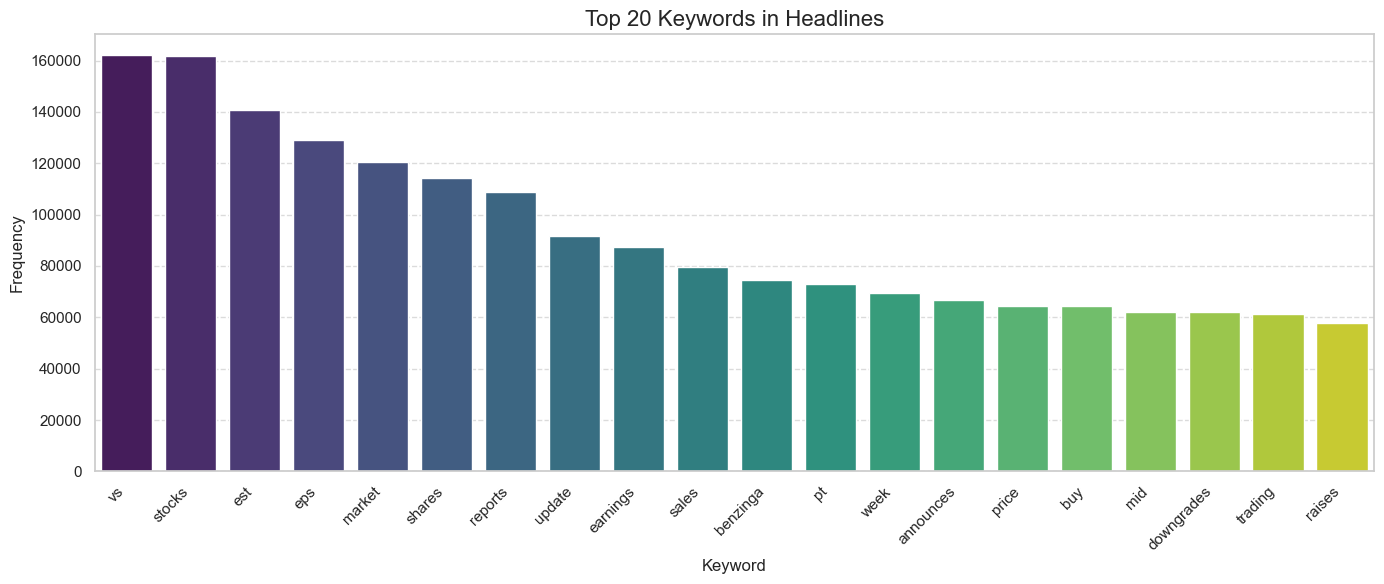

In [29]:
# ---------------------------------------------
# Visualize Top Keywords in Headlines
# ---------------------------------------------

# Sum the counts of each keyword across all headlines
word_counts = X.toarray().sum(axis=0)

# Combine keywords with counts into a DataFrame for easier plotting
keywords_df = pd.DataFrame({'keyword': keywords, 'count': word_counts})
keywords_df = keywords_df.sort_values(by='count', ascending=False).head(20)  # top 20 keywords

# Set figure size and style
plt.figure(figsize=(14, 6))
sns.barplot(data=keywords_df, x='keyword', y='count', palette="viridis")

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Top 20 Keywords in Headlines", fontsize=16)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
